In [1]:
import pandas as pd
import re
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [2]:
d1=pd.read_csv("C:/Users/manik/Desktop/project 6/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
d2=pd.read_csv("C:/Users/manik/Desktop/project 6/ResaleFlatPricesBasedonApprovalDate19901999.csv")
d3=pd.read_csv("C:/Users/manik/Desktop/project 6/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
d4=pd.read_csv("C:/Users/manik/Desktop/project 6/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
d5=pd.read_csv("C:/Users/manik/Desktop/project 6/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")

In [3]:
cocat_df = pd.concat([d1, d2, d5], ignore_index=True)

In [4]:
data = pd.concat([cocat_df, d3, d4], ignore_index=True)

In [5]:
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
914352,2023-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,788888.0,63 years 01 month
914353,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,62 years 10 months
914354,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,755000.0,62 years 10 months
914355,2023-12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,780000.0,63 years 02 months


In [6]:
data.shape

(914357, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914357 entries, 0 to 914356
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                914357 non-null  object 
 1   town                 914357 non-null  object 
 2   flat_type            914357 non-null  object 
 3   block                914357 non-null  object 
 4   street_name          914357 non-null  object 
 5   storey_range         914357 non-null  object 
 6   floor_area_sqm       914357 non-null  float64
 7   flat_model           914357 non-null  object 
 8   lease_commence_date  914357 non-null  int64  
 9   resale_price         914357 non-null  float64
 10  remaining_lease      205307 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.7+ MB


In [8]:
data.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [9]:
data.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,914357.000000,914357.000000,9.143570e+05
mean,95.697315,1988.135996,3.169452e+05
std,25.849919,10.518497,1.671632e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.910000e+05
50%,93.000000,1986.000000,2.950000e+05
75%,113.000000,1996.000000,4.120000e+05
max,307.000000,2022.000000,1.500000e+06


In [10]:
data.skew(numeric_only= True)

floor_area_sqm         0.367521
lease_commence_date    0.628255
resale_price           0.923629
dtype: float64

In [14]:
data['month'] = pd.to_datetime(data['month'])

# Extract the year and month into separate columns
data['year'] = data['month'].dt.year
data['month'] = data['month'].dt.month

In [15]:
# Calculate the remaining lease
data['remaining_lease'] = data['lease_commence_date'] + 99 - data['year']

In [16]:
data['flat_type'] = data['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [17]:
data['flat_type'].value_counts()

4 ROOM              346848
3 ROOM              292842
5 ROOM              192504
EXECUTIVE            68869
2 ROOM               11456
1 ROOM                1300
MULTI GENERATION       538
Name: flat_type, dtype: int64

In [19]:
data['flat_model'] = data['flat_model'].str.lower()
data['flat_model'] = data['flat_model'].str.title()

In [11]:
#Visualization

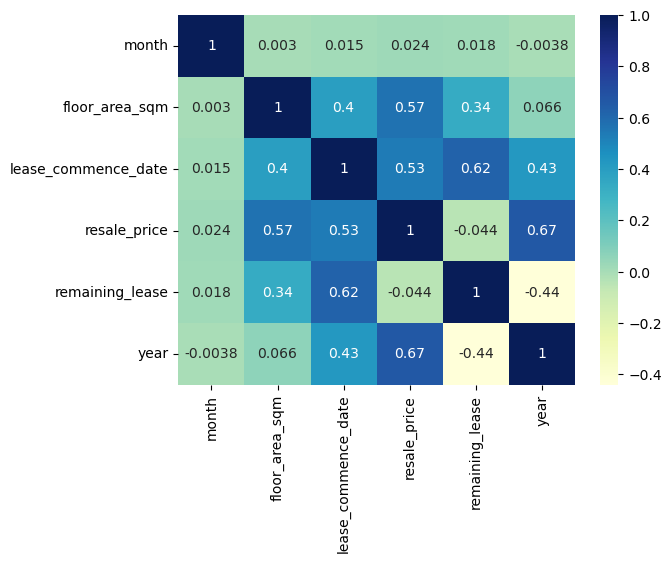

In [20]:
sns.heatmap(data.corr(numeric_only=True),cmap="YlGnBu", annot=True)
plt.show()

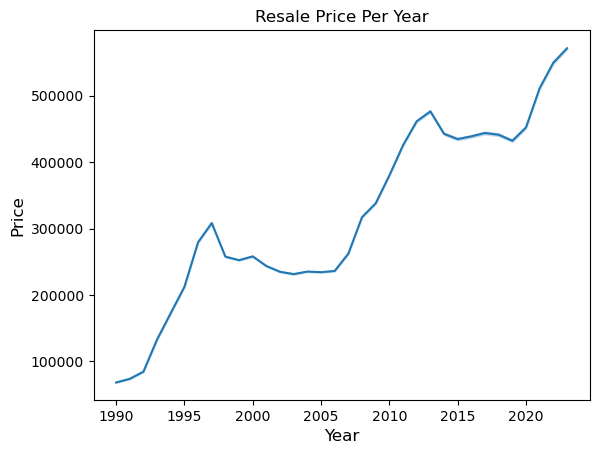

In [21]:
sns.lineplot(data = data, x ='year', y = 'resale_price')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Price',fontsize = 12)
plt.title("Resale Price Per Year")
plt.show()

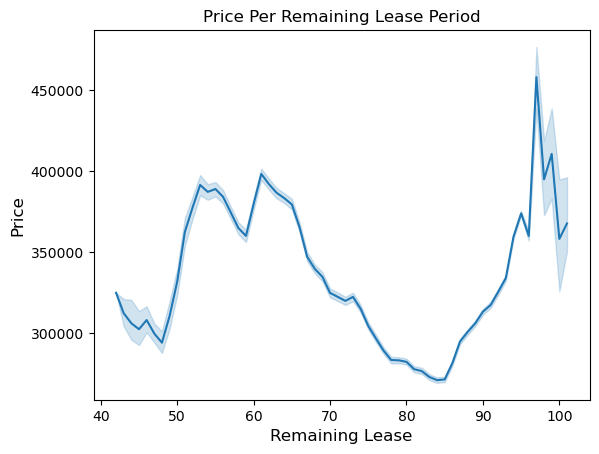

In [22]:
sns.lineplot(data = data, x ='remaining_lease', y = 'resale_price')
plt.xlabel('Remaining Lease', fontsize = 12)
plt.ylabel('Price',fontsize = 12)
plt.title("Price Per Remaining Lease Period")
plt.show()

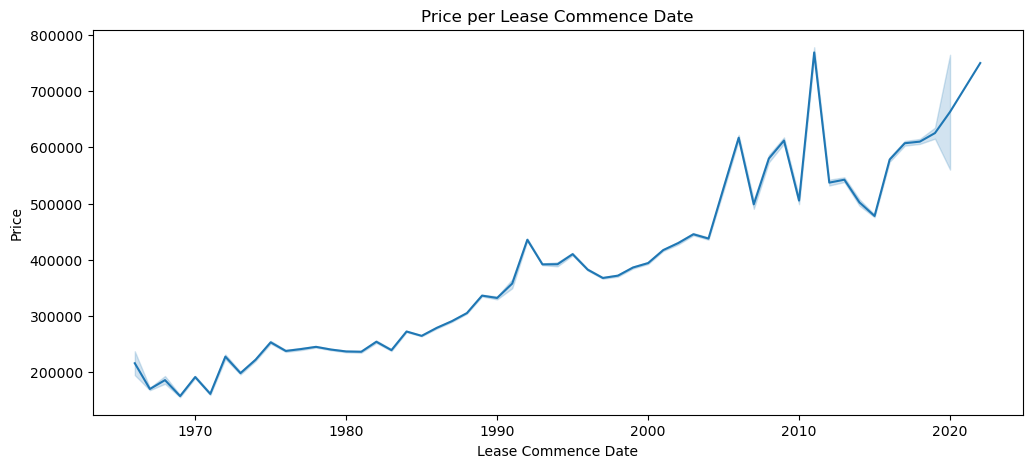

In [23]:
plt.figure(figsize=(12,5))
sns.lineplot(x='lease_commence_date', y='resale_price', data=data)
plt.xlabel('Lease Commence Date')
plt.ylabel('Price')
plt.title('Price per Lease Commence Date')
plt.show()

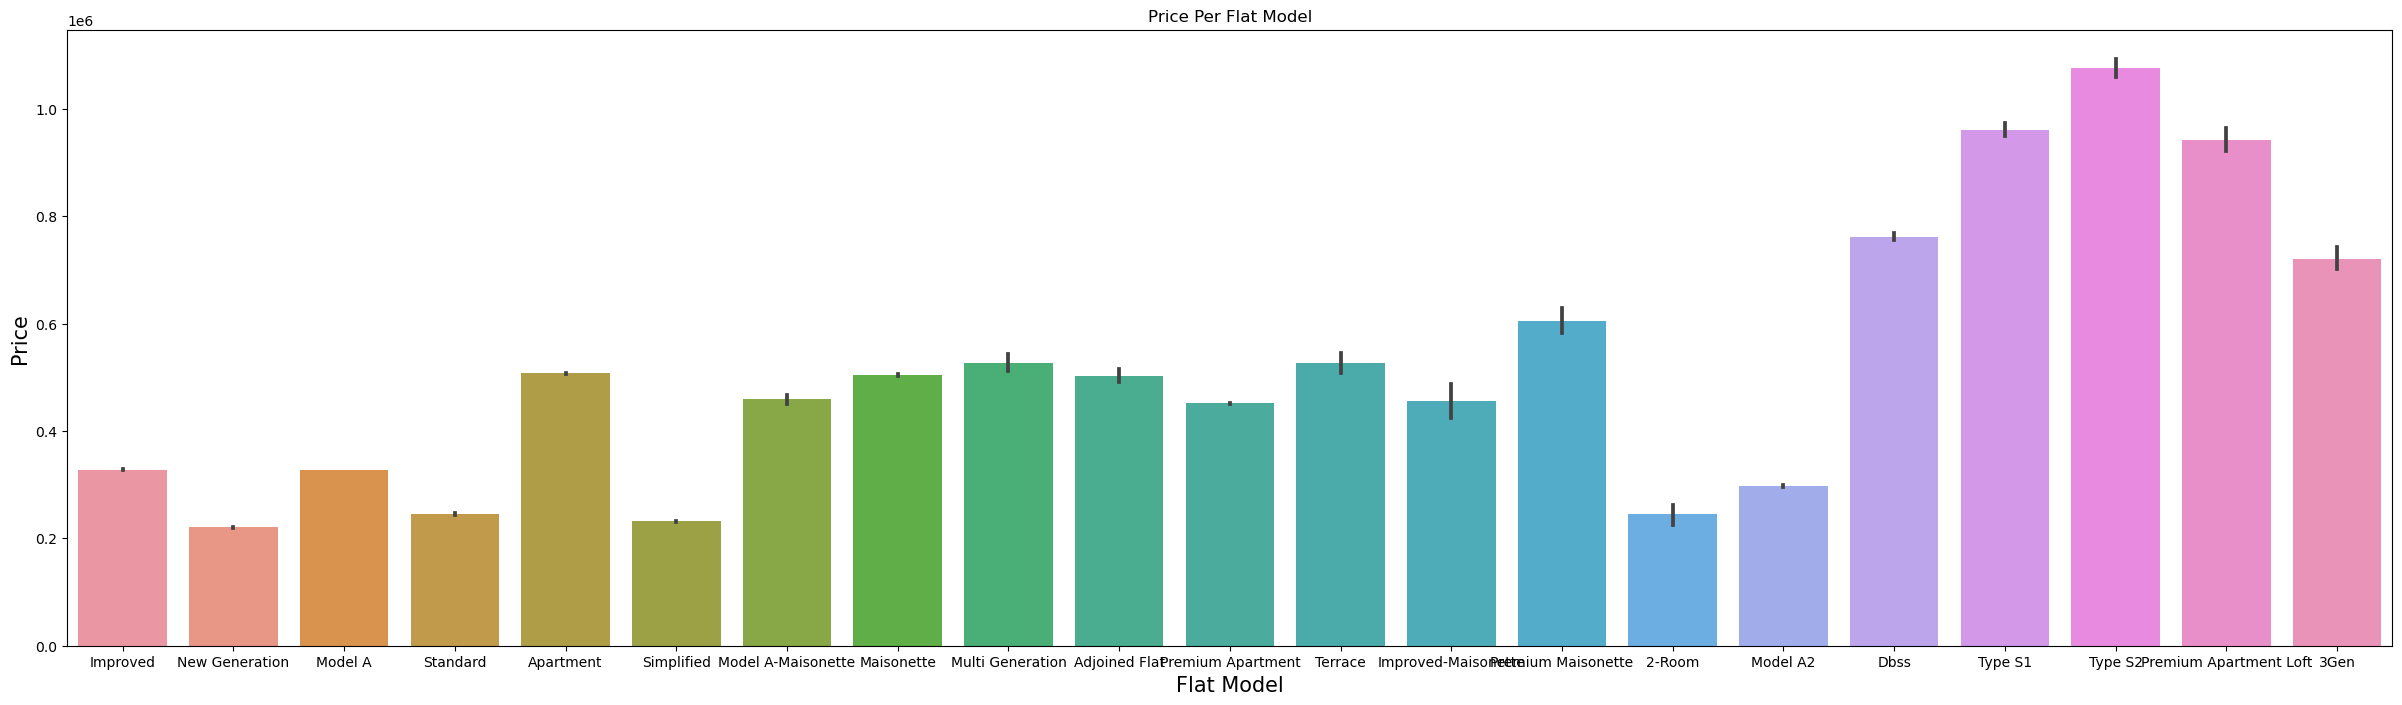

In [24]:
plt.figure(figsize=(30,8))
sns.barplot(x='flat_model',y = 'resale_price', data=data)
plt.xlabel('Flat Model', fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.title("Price Per Flat Model")
plt.show()

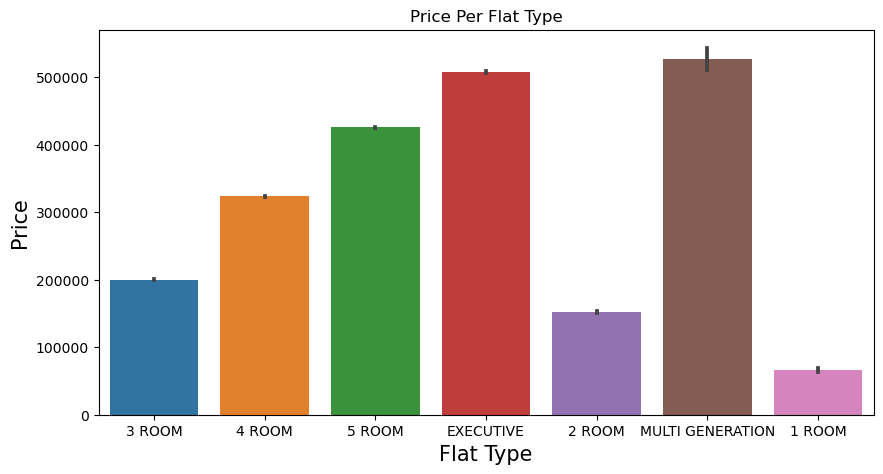

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(data = data, x ='flat_type',y = 'resale_price')
plt.xlabel('Flat Type', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Price Per Flat Type')
plt.show()

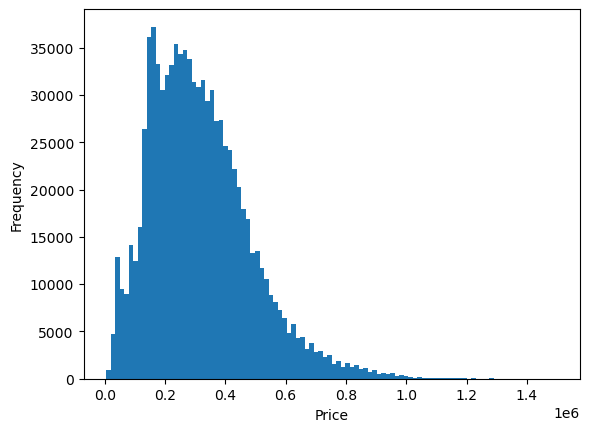

In [26]:
plt.hist(data['resale_price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [27]:
for value in data.columns:
    if data[value].dtypes == "object":
        data[value] = pd.Categorical(data[value]).codes

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914357 entries, 0 to 914356
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                914357 non-null  int64  
 1   town                 914357 non-null  int8   
 2   flat_type            914357 non-null  int8   
 3   block                914357 non-null  int16  
 4   street_name          914357 non-null  int16  
 5   storey_range         914357 non-null  int8   
 6   floor_area_sqm       914357 non-null  float64
 7   flat_model           914357 non-null  int8   
 8   lease_commence_date  914357 non-null  int64  
 9   resale_price         914357 non-null  float64
 10  remaining_lease      914357 non-null  int64  
 11  year                 914357 non-null  int64  
dtypes: float64(2), int16(2), int64(4), int8(4)
memory usage: 48.8 MB


In [29]:
X = data.drop('resale_price', axis = 1)
y = data.pop('resale_price')

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.3,random_state=1)

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
model = DecisionTreeRegressor(random_state=1)

In [34]:
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [35]:
ytest_pred = model.predict(X_test)
ytrain_pred = model.predict(X_train)

In [36]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
metrics.mean_squared_error(ytest_pred,y_test)

906907664.631653

In [38]:
r2 = r2_score(ytest_pred,y_test)

In [39]:
print(r2)

0.9672659336363363


In [40]:
x_pred = model.predict(X_train)

In [41]:
metrics.mean_squared_error(ytrain_pred,y_train)

3972279.643514215

In [42]:
r2 = r2_score(ytrain_pred,y_train)
print(r2)

0.9998581683264399


In [43]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {
    'max_depth' : [None,5,10,15],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'max_features' : [11]
}

In [45]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [None, 5, 10, 15], 'max_features': [11],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [46]:
best_param = grid_search.best_params_

In [47]:
best_dt_regressor = DecisionTreeRegressor(**best_param)
best_dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_features=11, min_samples_leaf=4, min_samples_split=10)

In [48]:
y_pred_dt = best_dt_regressor.predict(X_test)

mse_dt = mean_squared_error(y_test,y_pred_dt)
print("Best decision tree MSE:" , mse_dt)
print("Best decision tree hyperparameters:", best_param)

Best decision tree MSE: 753091011.7087961
Best decision tree hyperparameters: {'max_depth': None, 'max_features': 11, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [49]:
r2_dt = r2_score(y_test,y_pred_dt) # Testng results
print(r2_dt)

0.9728966180443923


In [50]:
y_train_pred_dt = best_dt_regressor.predict(X_train)

In [51]:
r2_train_dt = r2_score(y_train,y_train_pred_dt) # Training results
print(r2_train_dt)

0.9894560954405994


In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
d = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['sqrt']
}



In [54]:
# gridsearchcv
grid_search = GridSearchCV(estimator=d, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Best hyperparameters: {'max_depth': 22, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}


In [55]:
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

 
Mean squared error: 1051555484.3494905
Mean Absolute Error 20921.285222335846
Root Mean squared error: 32427.696254120343
 
R-squared: 0.9621550257582162


In [56]:
# Saving the model
from sklearn.preprocessing import StandardScaler as scalar
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scalar.pkl', 'wb') as f:
    pickle.dump(scalar, f)